### Imports
Importazioni dei pacchetti e inizializzazioni varie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from repository import load_csv_to_dict

import os
import traceback

from heuristic import *
from problem import ProblemFactory
from search import ReachGoal
from visualize import Animation
from input_handler import InputHandler
import repository
import pandas as pd

## Confronto sulle diverse euristiche

Distanza diagonale

In [2]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_h1.csv --heuristic h1 --csv_output")

Distanza di Chebyshev

In [6]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_h2.csv --heuristic h2 --csv_output")

Distanza di Manhattan

In [7]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_h3.csv --heuristic h3 --csv_output")

Distanze Euclidea

In [8]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_h4.csv --heuristic h4 --csv_output")

Carico e pulisco i risultati

In [9]:
# Distanza diagonale
df_h1 = pd.read_csv("benchmarks\output_csv\output_exp_0_h1.csv")
df_h1 = df_h1.dropna()
df_h1 = df_h1.groupby(['rows']).mean()

# Distanza di Chebyshev
df_h2 = pd.read_csv("benchmarks\output_csv\output_exp_0_h2.csv")
df_h2 = df_h2.dropna()
df_h2 = df_h2.groupby(['rows']).mean()

# Distanza di Manhattan
df_h3 = pd.read_csv("benchmarks\output_csv\output_exp_0_h3.csv")
df_h3 = df_h3.dropna()
df_h3 = df_h3.groupby(['rows']).mean()

# Distanza Euclidea
df_h4 = pd.read_csv("benchmarks\output_csv\output_exp_0_h4.csv")
df_h4 = df_h4.dropna()
df_h4 = df_h4.groupby(['rows']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_15540\1295237037.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_h1 = df_h1.groupby(['rows']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_15540\1295237037.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_h2 = df_h2.groupby(['rows']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_15540\1295237037.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_

#### Confronto i tempi

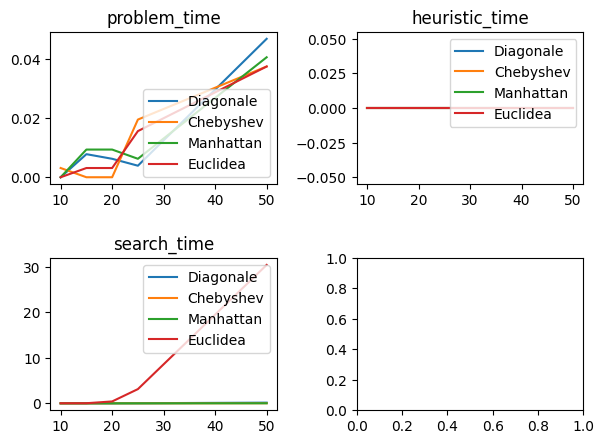

In [11]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_h1["problem_time"])
axs[0,0].plot(df_h2["problem_time"])
axs[0,0].plot(df_h3["problem_time"])
axs[0,0].plot(df_h4["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["Diagonale","Chebyshev","Manhattan","Euclidea"])

# heuristic_time
axs[0,1].plot(df_h1["heuristic_time"])
axs[0,1].plot(df_h2["heuristic_time"])
axs[0,1].plot(df_h3["heuristic_time"])
axs[0,1].plot(df_h4["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["Diagonale","Chebyshev","Manhattan","Euclidea"])

# search_time
axs[1,0].plot(df_h1["search_time"])
axs[1,0].plot(df_h2["search_time"])
axs[1,0].plot(df_h3["search_time"])
axs[1,0].plot(df_h4["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["Diagonale","Chebyshev","Manhattan","Euclidea"])

fig.tight_layout(pad=2)

#### Percentuale nodi visitati

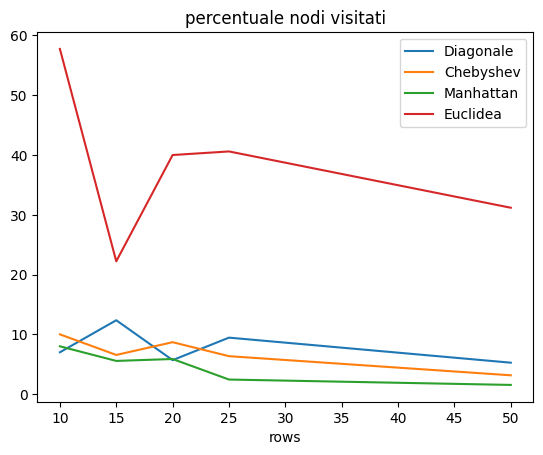

In [12]:
df_h1["percentage_visited_nodes"].plot()
df_h2["percentage_visited_nodes"].plot()
df_h3["percentage_visited_nodes"].plot()
df_h4["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["Diagonale","Chebyshev","Manhattan","Euclidea"])
plt.show()

## Test sulla grandezza della griglia


Eseguo la versione normale

In [2]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_n.csv --csv_output")

Eseguo la versione variante

In [3]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_v.csv -v --heuristic h5 --csv_output")

Carico i risultati e li pulisco

In [9]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_0_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_0_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_24120\4027860574.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_normale = df_normale.groupby(['rows']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_24120\4027860574.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_variante = df_variante.groupby(['rows']).mean()


#### Confronto i tempi delle due versioni

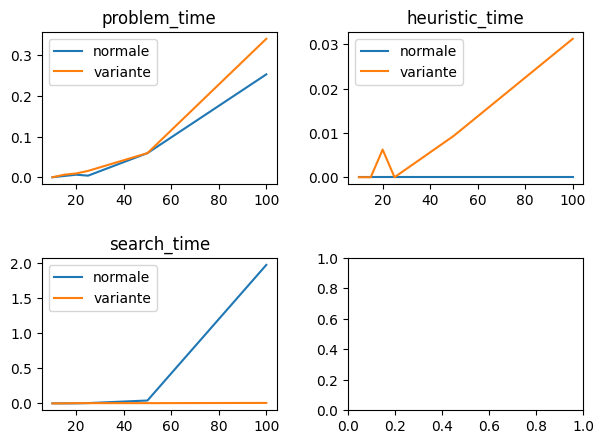

In [18]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Controllo sulla memoria occupata

Text(0.5, 1.0, 'memoria occupata dalla griglia')

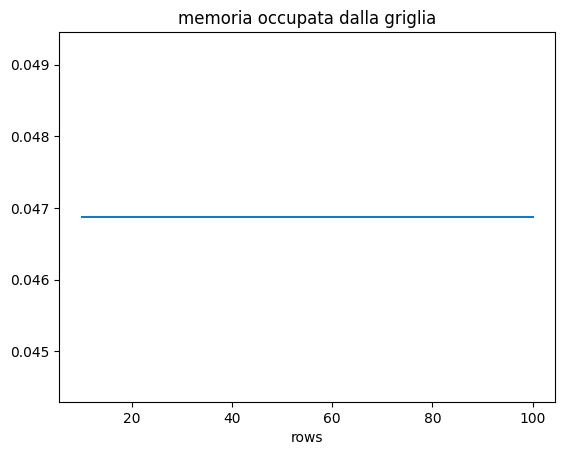

In [19]:
df_normale["mem_grid"].plot()

plt.title("memoria occupata dalla griglia")

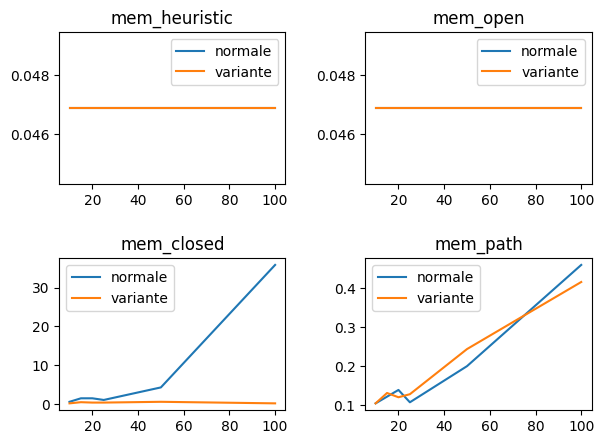

In [17]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Percentuale di nodi visitati

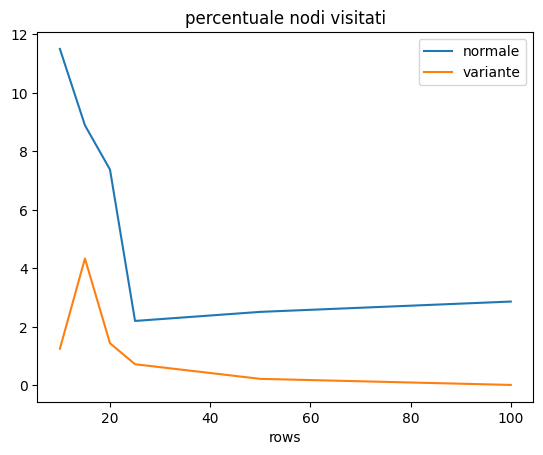

In [15]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

## Test sul numero di agenti


Eseguo i due algoritmi

In [3]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_1_n.csv  --csv_output")


In [6]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_1_v.csv -v --heuristic h5 --csv_output")

Carico e pulisco i risultati

In [9]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_1_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['num_agents']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_1_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['num_agents']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_24672\2375926315.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_normale = df_normale.groupby(['num_agents']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_24672\2375926315.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_variante = df_variante.groupby(['num_agents']).mean()


#### Confronto i tempi delle due versioni

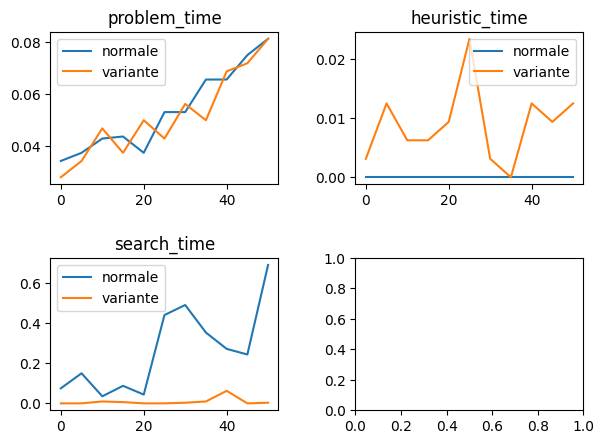

In [10]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Controllo la memoria occupata dalla griglia

Text(0.5, 1.0, 'memoria occupata dalla griglia')

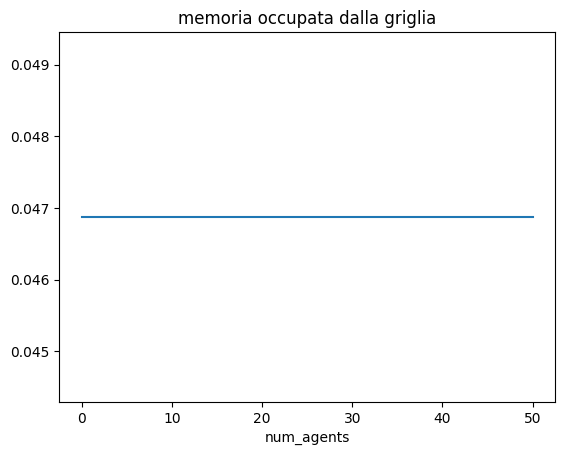

In [11]:
df_normale["mem_grid"].plot()

plt.title("memoria occupata dalla griglia")

#### Confronto le percentuali di nodi visitati

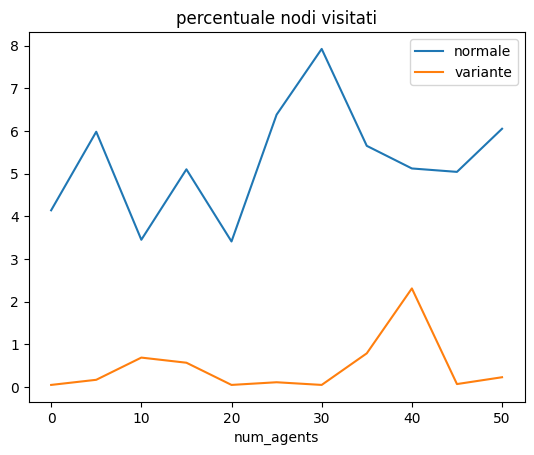

In [12]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto i costi e le lunghezze dei percorsi trovati

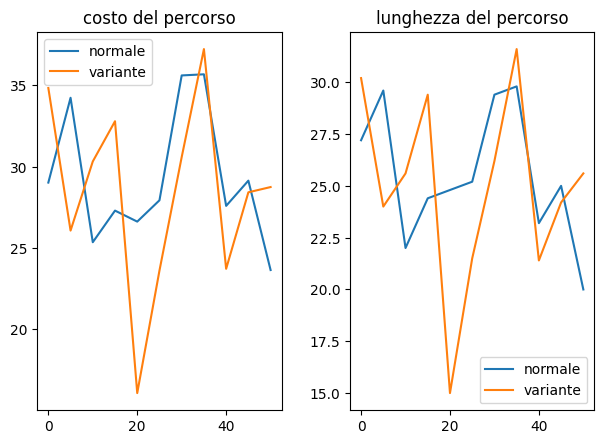

In [15]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)

## Test sull'attraversabilità della griglia

Eseguo la versione normale

In [ ]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_n.csv --csv_output")

Eseguo la variante

In [ ]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_v.csv -v --heuristic h5 --csv_output")

Leggo e pulisco i risultati

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_0_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_0_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

#### Confronto i tempi impiegati

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la memoria utilizzata

In [ ]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la percentuale di nodi visitati

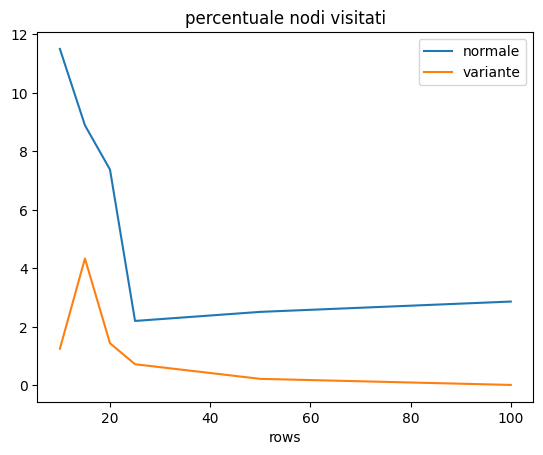

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto il costo e la lunghezza delle solulioni trovate

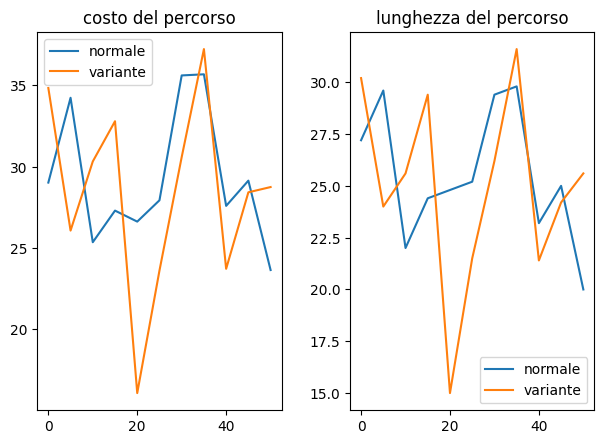

In [ ]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)

## Test sull'agglomerazione degli ostacoli

Eseguo la versione normale

In [ ]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_n.csv --csv_output")

Eseguo la variante

In [ ]:
for i in range(0,5):
    os.system("python pf4ea gen -f exp_0_v.csv -v --heuristic h5 --csv_output")

Leggo e pulisco i risultati

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_0_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_0_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

#### Confronto i tempi impiegati

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la memoria utilizzata

In [ ]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la percentuale di nodi visitati

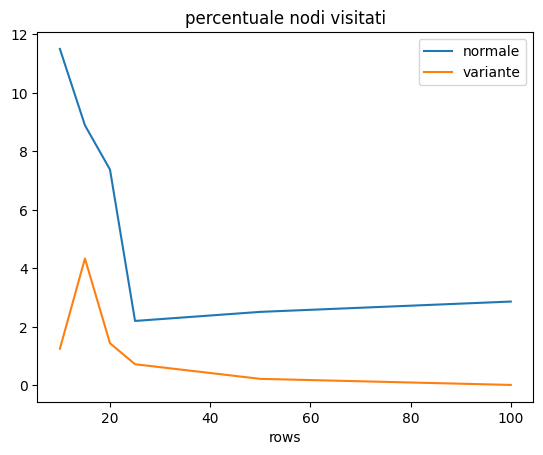

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto il costo e la lunghezza delle soluzioni trovate

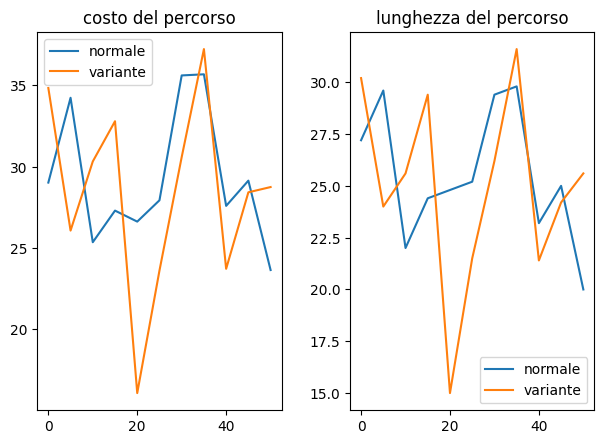

In [ ]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)